<a href="https://colab.research.google.com/github/harinimano/SelfOrganisingMap_NN/blob/main/som_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=f93f4f3e57eb3ef3cebf0082f96a01ddcfc797f5391afd38bb11cf01af33a6a0
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("Music Analysis") \
    .getOrCreate()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Adjust the file path based on your Google Drive structure
file_path = '/content/drive/MyDrive/tracks_features.csv'  #  file path

# Load the dataset into a Spark DataFrame
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows of the dataset
df.show(5)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------+------------------+---+-------------------+----+-----------+------------+----------------+-------------------+-------+-----------------+-----------+--------------+----+------------+
|                  id|                name|               album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|danceability|            energy|key|           loudness|mode|speechiness|acousticness|instrumentalness|           liveness|valence|            tempo|duration_ms|time_signature|year|release_date|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------+------------------+---+-------------------+----+-----------+------------+----------------+-------------------+----

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

<Figure size 1200x600 with 0 Axes>

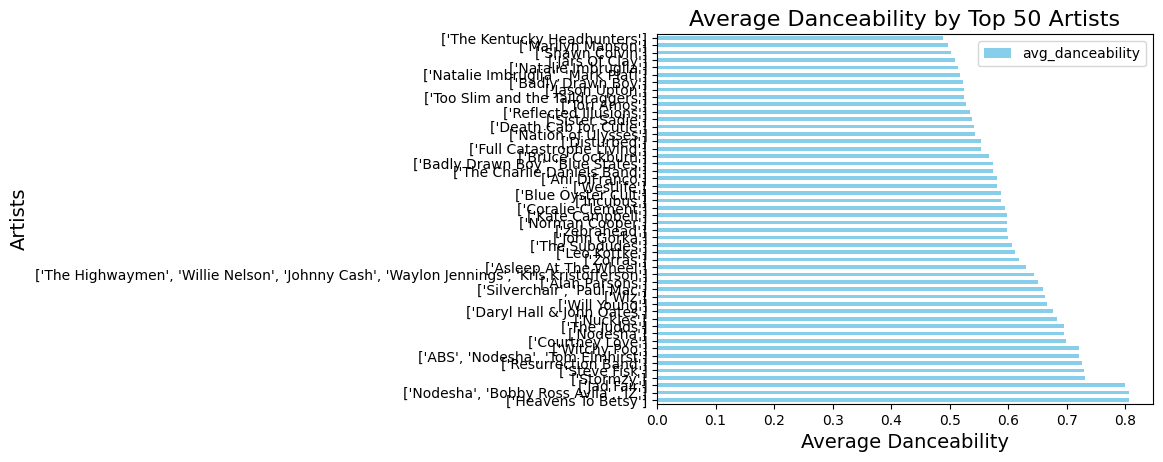

In [8]:
plt.figure(figsize=(12, 6))
limited_df = df.select("artists", "danceability").limit(1000)
artist_danceability = limited_df.groupBy("artists").agg(F.mean("danceability").alias("avg_danceability"))
artist_danceability = artist_danceability.toPandas()
top_artists = artist_danceability.sort_values('avg_danceability', ascending=False).head(50)

top_artists.plot(kind='barh', x='artists', y='avg_danceability', color='skyblue')
plt.title('Average Danceability by Top 50 Artists', fontsize=16)
plt.xlabel('Average Danceability', fontsize=14)
plt.ylabel('Artists', fontsize=14)
plt.yticks(fontsize=10)
plt.show()


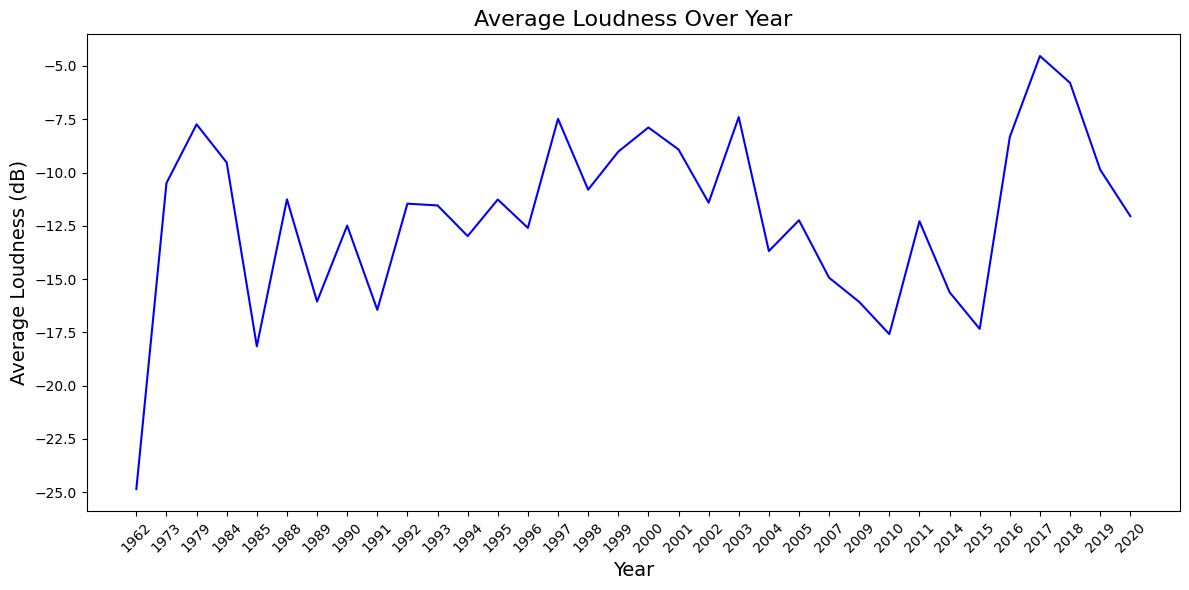

In [10]:
plt.figure(figsize=(12, 6))
limited_df = df.select("year", "loudness").limit(1000)
loudness_over_year = limited_df.groupBy("year").agg(F.mean("loudness").alias("avg_loudness")).orderBy("year")
loudness_over_year_pd = loudness_over_year.toPandas()

plt.plot(loudness_over_year_pd['year'], loudness_over_year_pd['avg_loudness'], color='blue')
plt.title('Average Loudness Over Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Loudness (dB)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


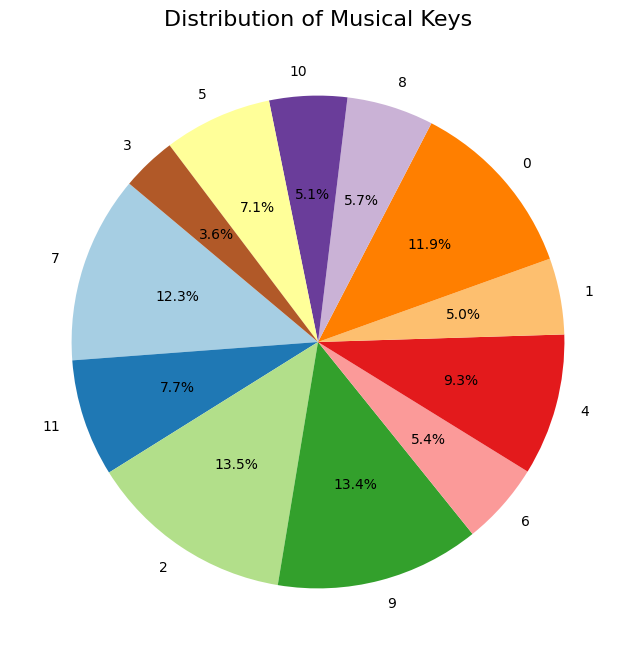

In [12]:
plt.figure(figsize=(8, 8))
limited_df = df.select("key").limit(1000)
key_distribution = limited_df.groupBy("key").count().toPandas()

colors = plt.cm.Paired(range(len(key_distribution)))
plt.pie(key_distribution['count'], labels=key_distribution['key'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Musical Keys', fontsize=16)
plt.show()


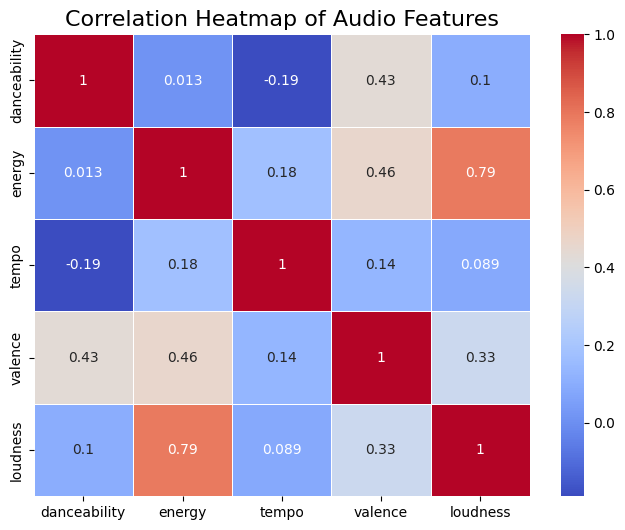

In [15]:
# Limit the dataset to relevant numerical features
limited_df = df.select("danceability", "energy", "tempo", "valence", "loudness").limit(1000)
audio_features = limited_df.toPandas()

# Calculate the correlation matrix
corr_matrix = audio_features.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Audio Features', fontsize=16)
plt.show()
